
**Create** **Neural** **Network to Regression Problem**

In [1]:

!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt    # use data visualize
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathiskasasindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 3.10MB/s]

In [4]:
# Load regression file
data = pd.read_csv("random-linear-regression/test.csv")

In [5]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
data.shape

(300, 2)

In [10]:
x = data['x']
y = data['y']

In [9]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

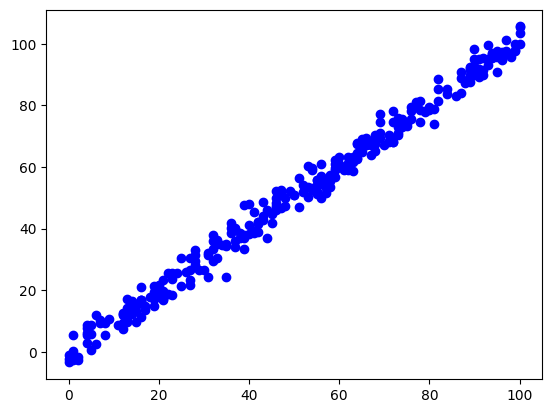

In [11]:
plt.scatter(x,y,c='b')
plt.show()

In [12]:
# train data set and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [13]:
x_train.shape,x_test.shape

((240,), (60,))

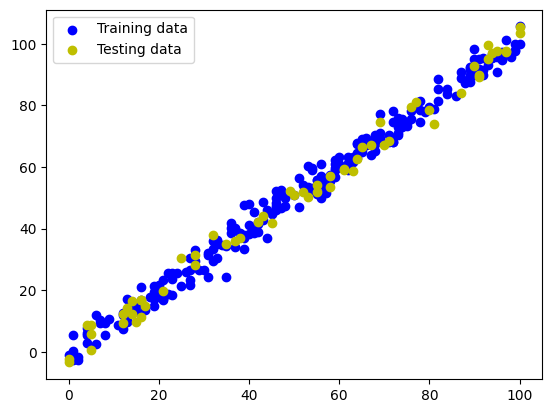

In [14]:
plt.scatter(x_train,y_train, c = 'b', label='Training data')
plt.scatter(x_test,y_test, c = 'y', label='Testing data')
plt.legend()
plt.show()

# Model Building

In [15]:
# import tensorflow
import tensorflow as tf

In [55]:
# Create the model
model = tf.keras.Sequential([
    # Create hidden layer
    tf.keras.layers.Dense(64, input_shape=(1,)),  # Dense -> fully connected layers
    tf.keras.layers.Dense(10),

    # Create output layer
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    # optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(lr = 0.05),
    metrics=["mae"]
)

# Train the model
epoch_number = 10
history = model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=epoch_number)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 11.3813 - mae: 11.3813
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 4.6248 - mae: 4.6248
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 3.3135 - mae: 3.3135
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 2.9008 - mae: 2.9008
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 2.4620 - mae: 2.4620
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 2.3925 - mae: 2.3925
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 2.4514 - mae: 2.4514
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 2.5534 - mae: 2.5534
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 2.6552 - mae: 2.6552
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 2.4833 - mae: 2.4833


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                128       
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
y_predictions = model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 6ms/step


array([[90.3036   ],
       [76.31204  ],
       [94.3012   ],
       [ 5.3548694],
       [91.30301  ]], dtype=float32)

In [48]:
y_test.head()

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

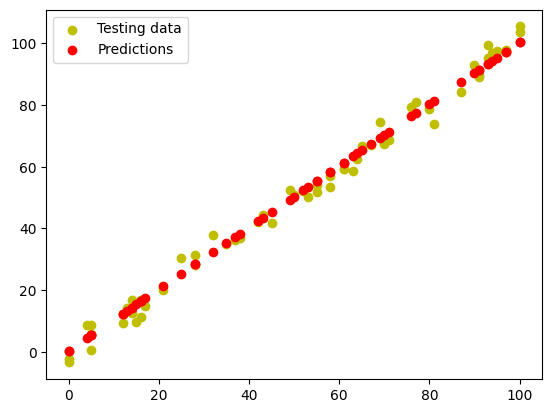

In [49]:
# plt.scatter(x_train,y_train, c = 'b', label='Training data')
plt.scatter(x_test,y_test, c = 'y', label='Testing data')
plt.scatter(x_test,y_predictions, c = 'r', label='Predictions')
plt.legend()
plt.show()

In [50]:
#evaluate the model
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.5471 - mae: 2.5471


[2.5471062660217285, 2.5471062660217285]

In [51]:
# using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions))  #tf.squeeze()->use to convert matrix one dimensional
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5471065>

In [52]:
# using MSE (Mean squared error)
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.550145>

In [53]:
tf.squeeze(y_predictions).shape

TensorShape([60])

In [54]:
y_predictions.shape

(60, 1)

In [56]:
history.history

{'loss': [11.381322860717773,
  4.62483549118042,
  3.3134710788726807,
  2.9008424282073975,
  2.462031364440918,
  2.392470359802246,
  2.451366424560547,
  2.553419589996338,
  2.655197858810425,
  2.483258008956909],
 'mae': [11.381322860717773,
  4.62483549118042,
  3.3134710788726807,
  2.9008424282073975,
  2.462031364440918,
  2.392470359802246,
  2.451366424560547,
  2.553419589996338,
  2.655197858810425,
  2.483258008956909]}

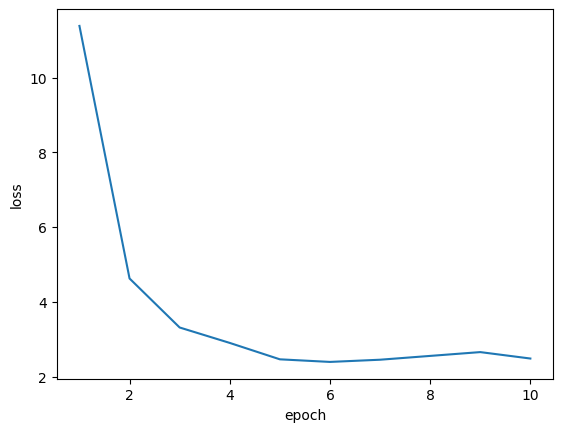

In [57]:
x_range = range(1,epoch_number+1)
loss = history.history['loss']
plt.plot(x_range,loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [60]:
for layer in model.layers:
  weight = layer.get_weights()[0]
  height = layer.get_weights()[1]
  print(f"\nWeights:\n {weight} \nBiases: \n{height}")


Weights:
 [[ 1.18380859e-01 -2.41091132e-01 -2.71849692e-01  2.71762282e-01
   1.09609760e-01  1.92944080e-01 -1.40846491e-01  2.89541811e-01
  -8.09171498e-02 -1.17307696e-02 -3.75162996e-02  1.43822700e-01
  -2.20619142e-01 -1.46050960e-01 -2.06774205e-01 -6.07469268e-02
   2.52385139e-01 -1.93823069e-01 -2.51281337e-04  2.39409506e-01
   1.06452465e-01 -1.19721003e-01 -2.43581057e-01  1.04836389e-01
   2.30304703e-01 -8.85644034e-02 -2.89439652e-02 -1.77351654e-01
   9.05718282e-02  9.78045836e-02 -1.23691550e-02  1.44634664e-01
   6.70343172e-03  2.94408798e-01 -2.32433140e-01 -1.51869938e-01
  -3.56483832e-02  1.00905351e-01 -2.03460202e-01  2.91358501e-01
   1.48650005e-01  2.35861555e-01  4.99222763e-02  1.18408330e-01
  -3.08151960e-01 -1.33721121e-02 -7.80313686e-02 -2.86148824e-02
   1.03796326e-01 -1.04431123e-01  9.58275199e-02  8.98925811e-02
   4.89096902e-03 -1.14194043e-02 -2.98654020e-01 -1.98394492e-01
  -2.22197741e-01  1.12879358e-01 -1.96180165e-01 -2.45695069e-01